In [116]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns
from ggplot import *

Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [122]:
# Survived = Pclass, Sex, Age, [SibSp, Parch] - Family , Fare, Embarked
train = pd.read_csv('/Users/changlonghuang/Documents/Python/Titanic/train.csv')
test = pd.read_csv('/Users/changlonghuang/Documents/Python/Titanic/test.csv')

# get info on the data columns
train.info()
test.info()
print train.describe()

# Cabin is probably correlated with class. passengerID, name, ticket are not important since they are IDs
not_needed_list = ['PassengerId', 'Name', 'Ticket', 'Cabin']
dummy_var_list = ['Sex', 'Embarked', 'Pclass']
y = 'Survived'

# fill the missing values in the train and test data
def set_col_to_bool(df, col1, col2, new_col):
    df[new_col] = df[col1] + df[col2]
    df[new_col].loc[df[new_col] > 0] = 1
    df[new_col].loc[df[new_col] == 0] = 0
    df = df.drop([col1,col2], axis = 1)
    return df

# iterate to drop features in a list and returns dataframe
def drop_list_features(df, list_of_features):
    for feature in list_of_features:
        df = df.drop(feature, axis = 1)
    return df

# automate most of the logistic regression steps
def logistic_modeling(df_x, df_y):
    log = LogisticRegression(class_weight = 'balanced')
    log.fit(df_x, df_y)
    print 'Score is: %.4f' % log.score(df_x, df_y)
    return log

# apply dummy variables to dataset
def apply_dummy(df, y, dummy_feature_list):
    new_df = pd.get_dummies(df, columns = dummy_feature_list)
    try:
        dummy_x = new_df.drop(y,axis =1)
    except:
        dummy_x = new_df
    return dummy_x

# cross validation of the model
def cross_validation(model, x, y):
    scores = cross_val_score(model, x,y , cv=5)
    print "Accuracy: %.2f (+/-%.2f)" %(scores.mean(), scores.std()*2)
    return scores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [120]:
"""
# data used for linear regression on Age
# Seems like the important variables for the linear regression are Fare, SibSp, Parch, Survived(dropped), Sex_female, Sex_male
linear_age_features = ['Fare', 'Family','Sex_female', 'Sex_male', 'Embarked_S']
train_age_null = set_col_to_bool(train[train['Age'].isnull()], 'SibSp', 'Parch', 'Family')
train_age_not_null = set_col_to_bool(train[train['Age'].notnull()], 'SibSp', 'Parch', 'Family')

new_x = drop_list_features(train_age_null, not_needed_list)
age_null = apply_dummy(new_x, 'Age', dummy_var_list)

new_y = drop_list_features(train_age_not_null, not_needed_list)
age_not_null_x = apply_dummy(new_y, 'Age', dummy_var_list)
age_not_null_y = new_y['Age']

lin = LinearRegression()
lin_model = lin.fit(age_not_null_x[linear_age_features],age_not_null_y)
train_pred = lin_model.predict(age_null[linear_age_features])
"""

/Users/changlonghuang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/changlonghuang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/changlonghuang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [121]:
rfc_age = RandomForestClassifier()
rfc_age.fit(age_not_null_x, age_not_null_y.astype(int))

feature_names = list(age_not_null_x)
importance = rfc_age.feature_importances_
indicies = np.argsort(importance)[::-1]

for i in indicies:
    print "Feature Name: %s | Importance Value: %.4f" %(feature_names[i], importance[i])



Feature Name: Fare | Importance Value: 0.7615
Feature Name: Survived | Importance Value: 0.0530
Feature Name: Family | Importance Value: 0.0347
Feature Name: Sex_male | Importance Value: 0.0341
Feature Name: Sex_female | Importance Value: 0.0253
Feature Name: Embarked_S | Importance Value: 0.0245
Feature Name: Embarked_C | Importance Value: 0.0243
Feature Name: Pclass_3 | Importance Value: 0.0129
Feature Name: Embarked_Q | Importance Value: 0.0109
Feature Name: Pclass_2 | Importance Value: 0.0104
Feature Name: Pclass_1 | Importance Value: 0.0084


In [80]:
# data used for predicting
train['Embarked'] = train['Embarked'].fillna('S')
train['Age'] = train['Age'].fillna(train['Age'].median())

#========Can work on Age feature========
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [81]:
# we know that Titanic survivers usually had family
full_train = set_col_to_bool(train, 'SibSp', 'Parch', 'Family')
full_test = set_col_to_bool(test, 'SibSp', 'Parch','Family')

print full_train.head()

#get descriptive stats
full_train.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

             Ticket     Fare Cabin Embarked  Family  
0         A/5 21171   7.2500   NaN        S       1  
1          PC 17599  71.2833   C85        C       1  
2  STON/O2. 3101282   7.9250   NaN        S       0  
3            113803  53.1000  C123        S       1  
4            373450   8.0500   NaN        S       0  


,PassengerId,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,32.204208,0.397306
std,257.353842,0.486592,0.836071,13.019697,49.693429,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,1.000000


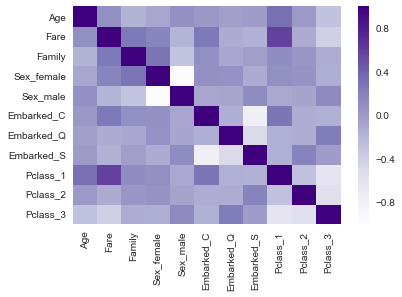

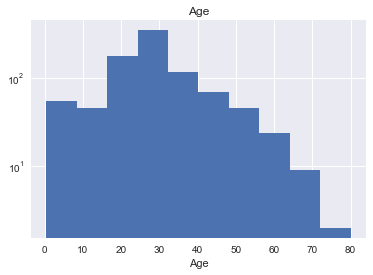

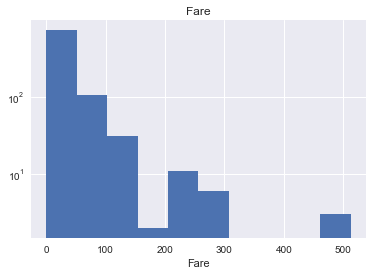

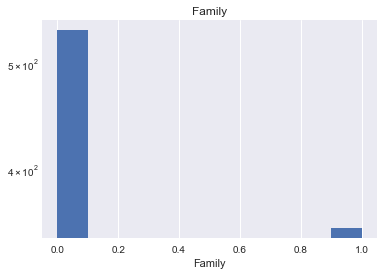

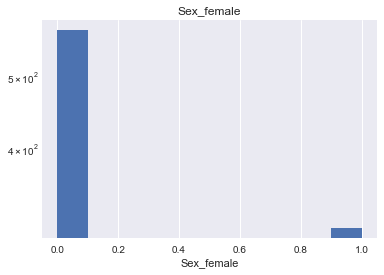

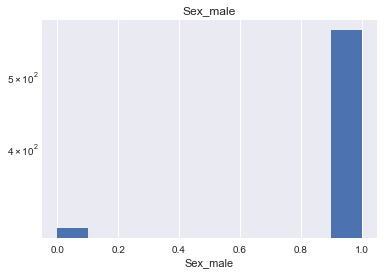

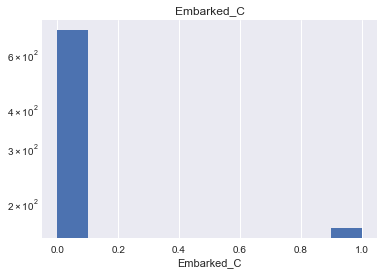

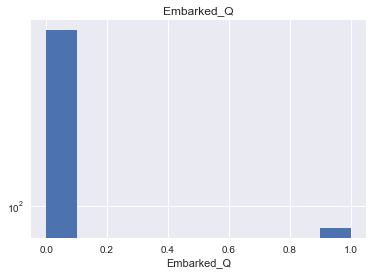

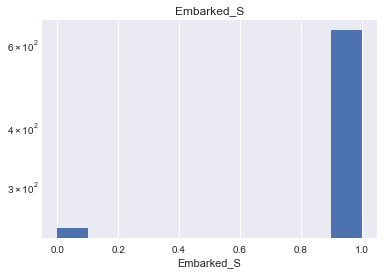

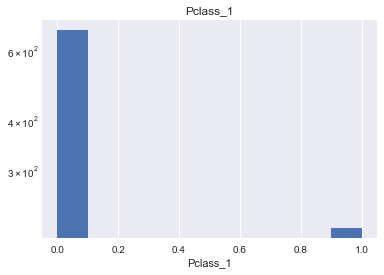

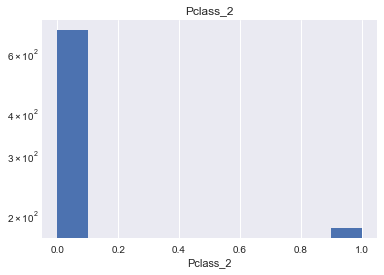

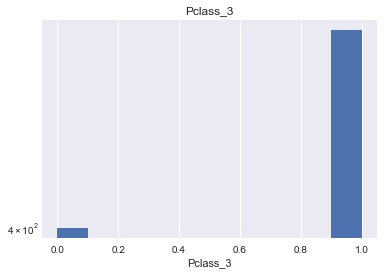

In [82]:
cleaned_train = drop_list_features(full_train, not_needed_list)
cleaned_test = drop_list_features(full_test, not_needed_list[1:])

# cleaned data
dummy_x = apply_dummy(cleaned_train, y, dummy_var_list)
dummy_test = apply_dummy(cleaned_test, y, dummy_var_list)
dummy_y = full_train[y]

"""
dummy_x_prediction = lin_model.predict(dummy_x[linear_age_features])
# fillna will fill a column of length x with the series of length y.
# So just predict on all data and then use fillna to spot fill the NaN values
dummy_x['Age'] =  dummy_x['Age'].fillna(pd.Series(dummy_x_prediction))


dummy_test_prediction = lin_model.predict(dummy_test[linear_age_features])
dummy_test['Age'] =  dummy_test['Age'].fillna(pd.Series(dummy_test_prediction))
"""
# create correlation matrix
cleaned_corr = dummy_x.corr()
sns.heatmap(cleaned_corr, xticklabels = True, cmap="Purples")

# create histograms of the data
# hist function does not take NaN well
for i in list(dummy_x):
    fig = plt.figure()
    plt.hist(dummy_x[i])
    plt.yscale('log')
    plt.title(i)
    plt.xlabel(i)
    plt.show()
    plt.close(fig)

In [105]:
rfc = RandomForestClassifier(n_estimators = 200, max_features = 9, max_depth = 9, class_weight= "balanced", random_state = 3)
rfc_model = rfc.fit(dummy_x, dummy_y)

feature_names = list(dummy_x)
importance = rfc_model.feature_importances_
indicies = np.argsort(importance)[::-1]

print "Score of Random Tree is: %4.f" % rfc_model.score(dummy_x, dummy_y)

for i in indicies:
    print "Feature Name: %s | Importance Value: %.4f" %(feature_names[i], importance[i])
print cross_validation(rfc_model, dummy_x, dummy_y)

Score of Random Tree is:    1
Feature Name: Sex_male | Importance Value: 0.3266
Feature Name: Fare | Importance Value: 0.2462
Feature Name: Age | Importance Value: 0.2223
Feature Name: Pclass_3 | Importance Value: 0.0636
Feature Name: Sex_female | Importance Value: 0.0505
Feature Name: Pclass_1 | Importance Value: 0.0297
Feature Name: Family | Importance Value: 0.0167
Feature Name: Pclass_2 | Importance Value: 0.0124
Feature Name: Embarked_C | Importance Value: 0.0124
Feature Name: Embarked_S | Importance Value: 0.0123
Feature Name: Embarked_Q | Importance Value: 0.0072
Accuracy: 0.83 (+/-0.04)
[ 0.80446927  0.81564246  0.84831461  0.80898876  0.85875706]


In [124]:
# logistic regression
first_model = logistic_modeling(dummy_x, dummy_y)
print list(dummy_x)
print cross_validation(first_model, dummy_x, dummy_y)

Score is: 0.7845
['Age', 'Fare', 'Family', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']
Accuracy: 0.78 (+/-0.02)
[ 0.78212291  0.76536313  0.79213483  0.75842697  0.77966102]


In [125]:
# logistic regression round two
# not needed features after random tree ['Embarked_S', 'Embarked_C', 'Embarked_Q']
embarked_feature = ['Embarked_S', 'Embarked_C', 'Embarked_Q', 'Pclass_2', 'Family']
new_dummy_x = drop_list_features(dummy_x, embarked_feature)

second_model = logistic_modeling(new_dummy_x, dummy_y)
print list(new_dummy_x)
print cross_validation(second_model, new_dummy_x, dummy_y)

Score is: 0.7856
['Age', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_3']
Accuracy: 0.78 (+/-0.03)
[ 0.77653631  0.77094972  0.79775281  0.75842697  0.78531073]


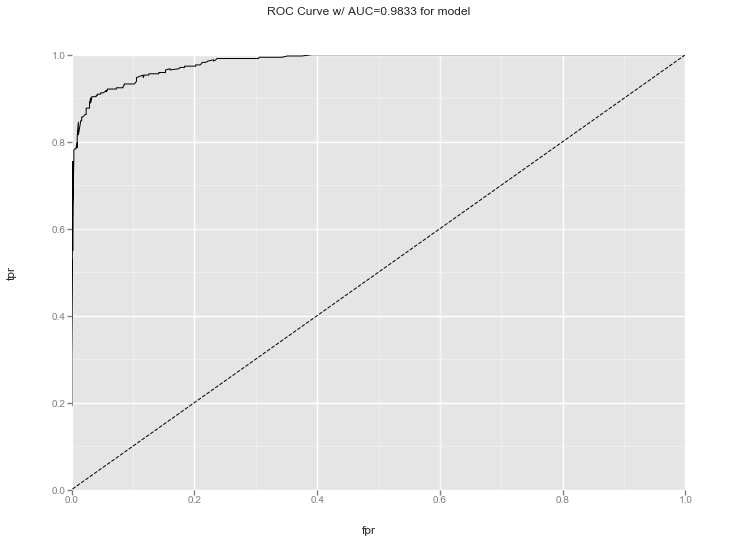

<ggplot: (289780197)>

In [107]:
# ROC curve
def ROC_curve_generation_log(model, x_dataset, y_dataset):
    pred = model.predict_proba(x_dataset)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_dataset, pred)
    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    auc = metrics.auc(fpr,tpr)
    ROC_plot = ggplot(df, aes(x='fpr', y='tpr')) +\
           geom_line() +\
           geom_abline(linetype='dashed') +\
           xlim(0,1) +\
           ylim(0,1) +\
           ggtitle("ROC Curve w/ AUC=%.4f for model" % auc)
    return ROC_plot

ROC_curve_generation_log(rfc_model,dummy_x, dummy_y)
#ROC_curve_generation_log(first_model, dummy_x, dummy_y)
#ROC_curve_generation_log(second_model, new_dummy_x, dummy_y)

In [108]:
# predictions here
def predict_on_test(test_df, model):
    new_df = pd.DataFrame()
    new_df['PassengerId'] = test_df['PassengerId']
    test_df = test_df.drop('PassengerId', axis = 1)
    pred = model.predict(test_df)
    new_df['Survived'] = pred
    return new_df

third_model_prediction = predict_on_test(dummy_test, rfc_model)
third_model_prediction.to_csv(path_or_buf = '/Users/changlonghuang/Documents/Python/Titanic/prediction5.csv',index = False)